In [1]:
import pandas as pd
df = pd.read_csv('/Users/suchirmvelpanur/Desktop/SDS-TA-Materials/Call Centre Case Study/Call Center Data.csv')
df

,Index,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
0,1,217,204,94.01%,13,0:00:17,0:02:14,0:02:45,76.28%
1,2,200,182,91.00%,18,0:00:20,0:02:22,0:06:55,72.73%
2,3,216,198,91.67%,18,0:00:18,0:02:38,0:03:50,74.30%
3,4,155,145,93.55%,10,0:00:15,0:02:29,0:03:12,79.61%
4,5,37,37,100.00%,0,0:00:03,0:02:06,0:00:35,97.30%
...,...,...,...,...,...,...,...,...,...
1246,1247,191,184,96.34%,7,0:00:07,0:02:50,0:01:56,92.55%
1247,1248,212,209,98.58%,3,0:00:10,0:02:51,0:01:45,89.10%
1248,1249,210,203,96.67%,7,0:00:12,0:03:22,0:03:52,85.24%
1249,1250,167,159,95.21%,8,0:00:16,0:03:16,0:02:42,83.03%


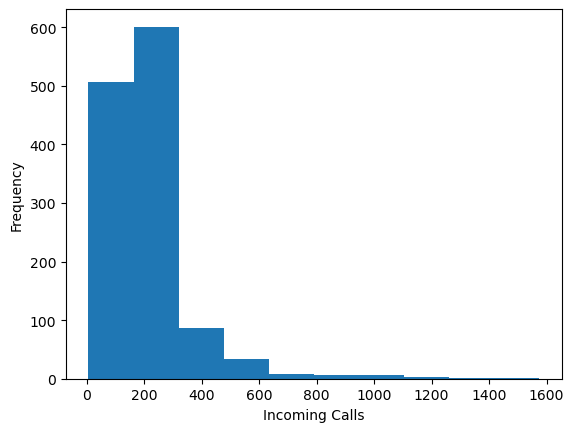

In [2]:
#visualising incoming calls
import matplotlib.pyplot as plt

df['Incoming Calls'].plot(kind = 'hist', xlabel = 'Incoming Calls')
plt.show()

In [3]:
'''The distribution of "Incoming Calls" is Poisson because "Incoming calls" happen within a fixed interval of time,
randomly & independently, with a known average rate (λ).'''

'The distribution of "Incoming Calls" is Poisson because "Incoming calls" happen within a fixed interval of time,\nrandomly & independently, with a known average rate (λ).'

In [4]:
#Average rate (λ) of "Incoming Calls"

λ = df['Incoming Calls'].mean()

print(λ)

198.53956834532374


In [5]:
'''how much is the probability of receiving more than 200 calls?
P(x > 200) = 1 - P(x <= 200)'''

from scipy.stats import poisson
p = 1 - poisson.cdf(200, λ)

print(p)

0.4400981809273451


In [6]:
'''but how much is the probability of receiving 200 calls?
Poisson distribution is discrete so we can calculate probability for single values.

for calculating probability of single values in Poisson distribution we use pmf()
PMF = Probability Mass Function

poisson.pmf(200, λ)'''

0.028047041223249556

In [7]:
'''"Waiting Time" refers to the duration that a customer waits before their call is answered by an available agent.
the distribution of "Waiting Time" is Exponential.
Exponential distribution models the time between events in a Poisson process.'''

In [8]:
# checking data type of "Waiting Time"

print(df['Waiting Time (AVG)'].dtypes)

object


In [9]:
'''in Python "object" type is a generic data type, that can hold any type of value.
"timedelta" type used to store time intervals.'''

In [11]:
#convert the type of "Waiting Time" from "object" to "timedelta"

df['Waiting Time (AVG)'] = pd.to_timedelta(df['Waiting Time (AVG)'])

In [12]:
#check it's type again

print(df['Waiting Time (AVG)'].dtypes)

timedelta64[ns]


In [13]:
'''convert "Waiting Time" to minutes.
to convert time, we use "dt.total_seconds()" method.'''

df['waiting_time_minutes'] = df['Waiting Time (AVG)'].dt.total_seconds() / 60

In [14]:
df.head()

,Index,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds),waiting_time_minutes
0,1,217,204,94.01%,13,0:00:17,0:02:14,0 days 00:02:45,76.28%,2.750000
1,2,200,182,91.00%,18,0:00:20,0:02:22,0 days 00:06:55,72.73%,6.916667
2,3,216,198,91.67%,18,0:00:18,0:02:38,0 days 00:03:50,74.30%,3.833333
3,4,155,145,93.55%,10,0:00:15,0:02:29,0 days 00:03:12,79.61%,3.200000
4,5,37,37,100.00%,0,0:00:03,0:02:06,0 days 00:00:35,97.30%,0.583333


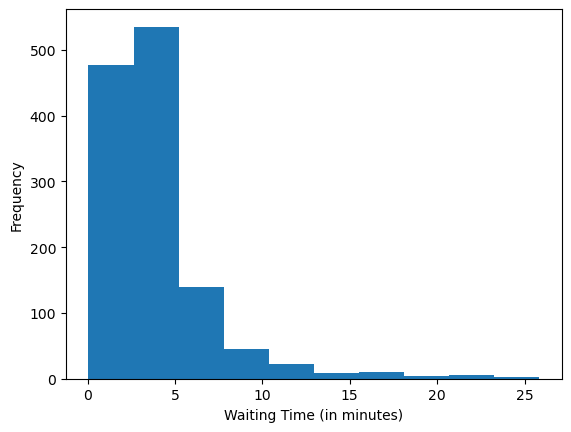

In [15]:
#visualize "waiting_time_minutes"

df['waiting_time_minutes'].plot(kind = 'hist', xlabel = 'Waiting Time (in minutes)')
plt.show()

In [16]:
# How much is the probability of Waiting Time exceeding 5 minutes?
# P(x > 5) = 1 - P(x <= 5)

from scipy.stats import expon
p = 1 - expon.cdf(5, 1/λ)

print(p)

0.006771970163116703


In [17]:
# in how many minutes do %90 of clients connect with the call center?
expon.ppf(0.9, 1/λ)

2.307621872354121

In [21]:
import pandas as pd
from scipy.stats import poisson

# Load the dataset (assuming it's a CSV file or already in the DataFrame 'df')
# df = pd.read_csv('path_to_your_dataset.csv')

# Calculate the average rate (λ) of "Incoming Calls"
lambda_rate = df['Incoming Calls'].mean()

# Define time durations (in hours)
time_durations = [2, 1, 0.5, 0.25]  # 1 hour, 30 minutes, 15 minutes

# Estimate the expected number of calls for each time duration
expected_calls = {}
for duration in time_durations:
    lambda_adjusted = λ * duration
    expected_calls[f"{duration} hour(s)"] = poisson.mean(lambda_adjusted)

# Display the expected number of calls for each duration
for duration, calls in expected_calls.items():
    print(f"Expected number of calls in {duration}: {calls:.2f}")


Expected number of calls in 2 hour(s): 397.08
Expected number of calls in 1 hour(s): 198.54
Expected number of calls in 0.5 hour(s): 99.27
Expected number of calls in 0.25 hour(s): 49.63
